## 데이터 변환 및 병합

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.

import os
import chardet
import joblib
import numpy as np
import pandas as pd

### 작업 경로 확인 및 변경

In [2]:
# 현재 작업 경로를 확인합니다.

os.getcwd()

'D:\\Data\\python2023\\PythonDataAnalysis1\\live'

In [3]:
# data 폴더로 작업 경로를 변경합니다.

os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.

sorted(os.listdir())

['APT_Detail_Seoul_2022.csv',
 'APT_Detail_Seoul_2022.xlsx',
 'APT_Price_Data.z',
 'APT_Price_Prep.z',
 'APT_Price_Seoul_2020.csv',
 'APT_Price_Seoul_2020_2022.xlsx',
 'APT_Price_Seoul_2021.csv',
 'APT_Price_Seoul_2022.csv',
 'NA_Sample.xlsx',
 'code',
 'test.xlsx']

### 실습 데이터셋 준비

In [5]:
# z 파일을 읽고 price, df1, df2에 할당합니다.

price, df1, df2 = joblib.load(filename = 'APT_Price_Prep.z')

In [6]:
# price의 정보를 확인합니다.

price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139917 entries, 0 to 139918
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   아파트     139917 non-null  object        
 1   시       139917 non-null  object        
 2   구       139917 non-null  object        
 3   동       139917 non-null  object        
 4   지번      139917 non-null  object        
 5   건축년도    139917 non-null  int32         
 6   거래일     139917 non-null  datetime64[ns]
 7   전용면적    139917 non-null  float64       
 8   층       139917 non-null  int32         
 9   거래금액    139917 non-null  float64       
 10  평당금액    139917 non-null  float64       
 11  거래년도    139917 non-null  int32         
 12  경과년수    139917 non-null  int32         
 13  거래월     139917 non-null  object        
 14  금액구간    139917 non-null  object        
 15  주소      139917 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(4), object(8)
memory usage: 16.0+ MB


In [7]:
# price의 처음 5행을 출력합니다.

price.head()

,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액,평당금액,거래년도,경과년수,거래월,금액구간,주소
0,신동아블루아광화문의꿈,서울특별시,종로구,필운동,254,2007,2020-01-03,111.97,6,10.0,2947.218005,2020,13,01월,5천 미만,서울특별시 종로구 필운동 254
1,광화문스페이스본(106동),서울특별시,종로구,사직동,9-1,2008,2020-01-02,163.33,2,16.2,3273.128023,2020,12,01월,5천 미만,서울특별시 종로구 사직동 9-1
2,세종로대우,서울특별시,종로구,내수동,167,1994,2020-01-06,109.91,11,8.8,2642.161769,2020,26,01월,5천 미만,서울특별시 종로구 내수동 167
3,킹스매너,서울특별시,종로구,내수동,110-15,2004,2020-01-09,194.43,4,13.0,2206.449622,2020,16,01월,5천 미만,서울특별시 종로구 내수동 110-15
4,경희궁파크팰리스,서울특별시,종로구,내수동,95,2003,2020-01-20,148.09,8,14.9,3320.278209,2020,17,01월,5천 미만,서울특별시 종로구 내수동 95


### 데이터프레임 정렬

In [8]:
# 층을 오름차순 정렬합니다.
# [참고] ascending 매개변수에 전달하는 인수의 기본값은 True입니다.

price['층'].sort_values()

17278     -3
49742     -3
31734     -2
49607     -2
29747     -2
          ..
122507    64
69573     66
110650    66
50867     66
55000     67
Name: 층, Length: 139917, dtype: int32

In [9]:
# 층을 내림차순 정렬합니다.

price['층'].sort_values(ascending = False)

55000     67
110650    66
50867     66
69573     66
137287    64
          ..
49607     -2
45769     -2
52683     -2
17278     -3
49742     -3
Name: 층, Length: 139917, dtype: int32

In [10]:
# price를 층으로 오름차순 정렬합니다.

price.sort_values(by = '층')

,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액,평당금액,거래년도,경과년수,거래월,금액구간,주소
17278,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-03-20,134.5100,-3,8.20,2011.746339,2020,10,03월,5천 미만,서울특별시 은평구 진관동 84
49742,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-07-23,134.5100,-3,10.40,2551.483161,2020,10,07월,5천 미만,서울특별시 은평구 진관동 84
31734,롯데캐슬골든힐스,서울특별시,성북구,길음동,1287-1,2019,2020-06-27,59.8946,-2,7.45,4104.710608,2020,1,06월,5천 미만,서울특별시 성북구 길음동 1287-1
49607,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-07-01,101.9900,-2,9.47,3064.123934,2020,10,07월,5천 미만,서울특별시 은평구 진관동 84
29747,옥수파크힐스101동~116동,서울특별시,성동구,옥수동,528,2016,2020-06-30,76.6600,-2,16.75,7210.409601,2020,4,06월,5천 이상,서울특별시 성동구 옥수동 528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122507,타워팰리스1,서울특별시,강남구,도곡동,467,2002,2021-09-30,222.4800,64,48.25,7156.823085,2021,19,09월,5천 이상,서울특별시 강남구 도곡동 467
69573,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2020-10-27,185.6220,66,38.00,6755.664738,2020,16,10월,5천 이상,서울특별시 강남구 도곡동 467-29
110650,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2021-06-24,214.9670,66,45.80,7030.846595,2021,17,06월,5천 이상,서울특별시 강남구 도곡동 467-29
50867,현대하이페리온,서울특별시,양천구,목동,916,2003,2020-07-03,154.0500,66,24.00,5141.187926,2020,17,07월,5천 이상,서울특별시 양천구 목동 916


In [11]:
# price를 층으로 내림차순 정렬합니다.

price.sort_values(by = '층', ascending = False)

,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액,평당금액,거래년도,경과년수,거래월,금액구간,주소
55000,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2020-07-25,235.740,67,54.25,7594.171545,2020,16,07월,5천 이상,서울특별시 강남구 도곡동 467-29
110650,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2021-06-24,214.967,66,45.80,7030.846595,2021,17,06월,5천 이상,서울특별시 강남구 도곡동 467-29
50867,현대하이페리온,서울특별시,양천구,목동,916,2003,2020-07-03,154.050,66,24.00,5141.187926,2020,17,07월,5천 이상,서울특별시 양천구 목동 916
69573,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2020-10-27,185.622,66,38.00,6755.664738,2020,16,10월,5천 이상,서울특별시 강남구 도곡동 467-29
137287,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2022-08-29,244.224,64,64.00,8647.798742,2022,18,08월,5천 이상,서울특별시 강남구 도곡동 467-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49607,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-07-01,101.990,-2,9.47,3064.123934,2020,10,07월,5천 미만,서울특별시 은평구 진관동 84
45769,옥수파크힐스101동~116동,서울특별시,성동구,옥수동,528,2016,2020-07-30,107.990,-2,22.00,6722.844708,2020,4,07월,5천 이상,서울특별시 성동구 옥수동 528
52683,천왕연지타운2단지,서울특별시,구로구,천왕동,281,2014,2020-07-02,84.780,-2,6.77,2635.173390,2020,6,07월,5천 미만,서울특별시 구로구 천왕동 281
17278,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-03-20,134.510,-3,8.20,2011.746339,2020,10,03월,5천 미만,서울특별시 은평구 진관동 84


In [12]:
# price를 층과 거래금액으로 내림차순 정렬합니다.

price.sort_values(by = ['층', '거래금액'], ascending = False)

,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액,평당금액,거래년도,경과년수,거래월,금액구간,주소
55000,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2020-07-25,235.7400,67,54.25,7594.171545,2020,16,07월,5천 이상,서울특별시 강남구 도곡동 467-29
110650,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2021-06-24,214.9670,66,45.80,7030.846595,2021,17,06월,5천 이상,서울특별시 강남구 도곡동 467-29
69573,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2020-10-27,185.6220,66,38.00,6755.664738,2020,16,10월,5천 이상,서울특별시 강남구 도곡동 467-29
50867,현대하이페리온,서울특별시,양천구,목동,916,2003,2020-07-03,154.0500,66,24.00,5141.187926,2020,17,07월,5천 이상,서울특별시 양천구 목동 916
137287,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2022-08-29,244.2240,64,64.00,8647.798742,2022,18,08월,5천 이상,서울특별시 강남구 도곡동 467-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49607,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-07-01,101.9900,-2,9.47,3064.123934,2020,10,07월,5천 미만,서울특별시 은평구 진관동 84
31734,롯데캐슬골든힐스,서울특별시,성북구,길음동,1287-1,2019,2020-06-27,59.8946,-2,7.45,4104.710608,2020,1,06월,5천 미만,서울특별시 성북구 길음동 1287-1
52683,천왕연지타운2단지,서울특별시,구로구,천왕동,281,2014,2020-07-02,84.7800,-2,6.77,2635.173390,2020,6,07월,5천 미만,서울특별시 구로구 천왕동 281
49742,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-07-23,134.5100,-3,10.40,2551.483161,2020,10,07월,5천 미만,서울특별시 은평구 진관동 84


In [13]:
# price를 층은 내림차순, 거래금액은 오름차순 정렬합니다.

price.sort_values(by = ['층', '거래금액'], ascending = [False, True])

,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액,평당금액,거래년도,경과년수,거래월,금액구간,주소
55000,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2020-07-25,235.740,67,54.25,7594.171545,2020,16,07월,5천 이상,서울특별시 강남구 도곡동 467-29
50867,현대하이페리온,서울특별시,양천구,목동,916,2003,2020-07-03,154.050,66,24.00,5141.187926,2020,17,07월,5천 이상,서울특별시 양천구 목동 916
69573,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2020-10-27,185.622,66,38.00,6755.664738,2020,16,10월,5천 이상,서울특별시 강남구 도곡동 467-29
110650,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2021-06-24,214.967,66,45.80,7030.846595,2021,17,06월,5천 이상,서울특별시 강남구 도곡동 467-29
93843,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004,2021-02-10,214.967,64,46.00,7061.548982,2021,17,02월,5천 이상,서울특별시 강남구 도곡동 467-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49607,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-07-01,101.990,-2,9.47,3064.123934,2020,10,07월,5천 미만,서울특별시 은평구 진관동 84
29747,옥수파크힐스101동~116동,서울특별시,성동구,옥수동,528,2016,2020-06-30,76.660,-2,16.75,7210.409601,2020,4,06월,5천 이상,서울특별시 성동구 옥수동 528
45769,옥수파크힐스101동~116동,서울특별시,성동구,옥수동,528,2016,2020-07-30,107.990,-2,22.00,6722.844708,2020,4,07월,5천 이상,서울특별시 성동구 옥수동 528
17278,은평뉴타운우물골(두산위브7단지),서울특별시,은평구,진관동,84,2010,2020-03-20,134.510,-3,8.20,2011.746339,2020,10,03월,5천 미만,서울특별시 은평구 진관동 84


> #### * False, True 이해

In [14]:
def plus(a, b):
    return a + b

In [15]:
plus(a = 1, b = 2)

3

In [16]:
def plus(a = 1, b = 1):
    return a + b

In [17]:
plus()

2

### 집계 함수로 데이터 요약

In [18]:
# 거래금액에서 결측값 아닌 빈도수를 반환합니다.

price['거래금액'].count()

139917

In [19]:
# 거래금액의 합계를 반환합니다.

price['거래금액'].sum()

1277873.9268999998

In [20]:
# 거래금액의 평균을 반환합니다.

price['거래금액'].mean()

9.133085521416268

In [21]:
# 거래금액의 표준편차를 반환합니다.

price['거래금액'].std()

6.747949076315124

In [22]:
# 거래금액의 최솟값을 반환합니다.

price['거래금액'].min()

0.6

In [23]:
# 거래금액의 최댓값을 반환합니다.

price['거래금액'].max()

145.0

### 범주별 집계 함수로 데이터 요약

> 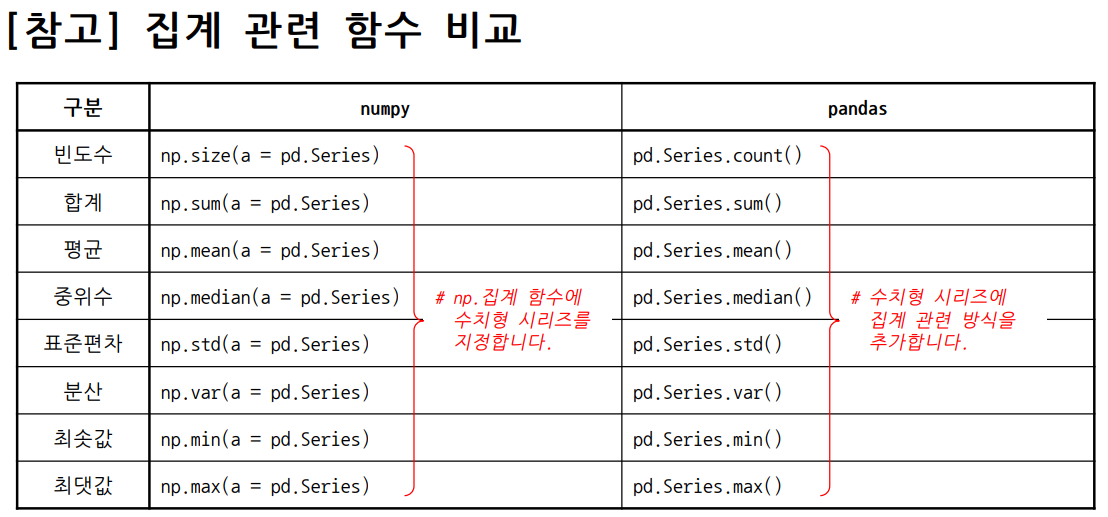

In [24]:
# 거래년도별 거래금액에서 결측값 아닌 빈도수를 반환합니다.

price.groupby(by = '거래년도')['거래금액'].count()

거래년도
2020    84294
2021    43420
2022    12203
Name: 거래금액, dtype: int64

In [25]:
# 거래년도별 거래금액 합계를 반환합니다.

price.groupby(by = '거래년도')['거래금액'].sum()

거래년도
2020    713033.1645
2021    445931.3192
2022    118909.4432
Name: 거래금액, dtype: float64

In [26]:
# 거래년도별 거래금액 평균을 반환합니다.

price.groupby(by = '거래년도')['거래금액'].mean()

거래년도
2020     8.458884
2021    10.270182
2022     9.744280
Name: 거래금액, dtype: float64

In [27]:
# 거래년도별 거래금액 표준편차를 반환합니다.

price.groupby(by = '거래년도')['거래금액'].std()

거래년도
2020    5.683750
2021    7.510029
2022    9.495091
Name: 거래금액, dtype: float64

In [28]:
# 거래년도별 거래금액 최솟값을 반환합니다.

price.groupby(by = '거래년도')['거래금액'].min()

거래년도
2020    0.60
2021    0.66
2022    0.67
Name: 거래금액, dtype: float64

In [29]:
# 거래년도별 거래금액 최댓값을 반환합니다.

price.groupby(by = '거래년도')['거래금액'].max()

거래년도
2020     77.5
2021    120.0
2022    145.0
Name: 거래금액, dtype: float64

### 피벗 테이블 생성

> 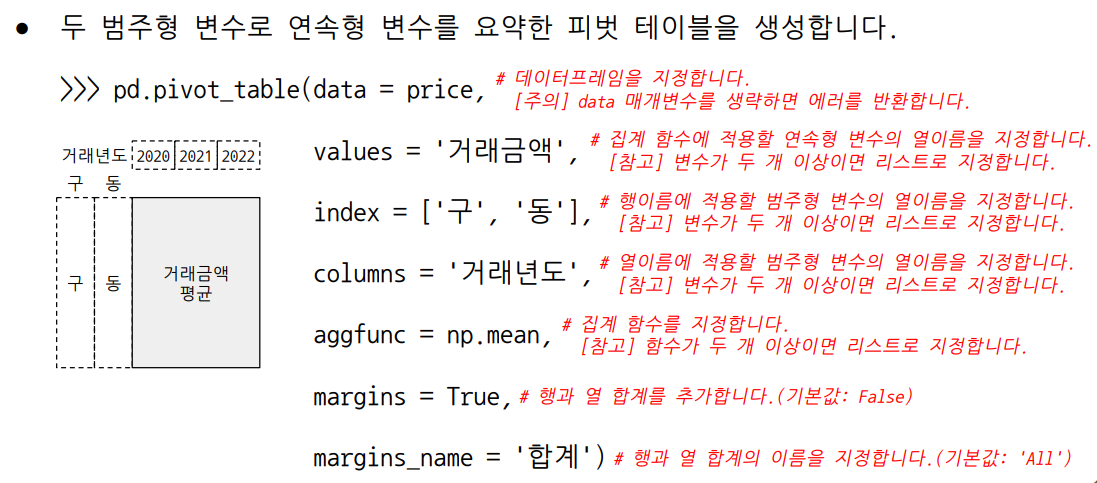

In [30]:
pd.pivot_table(
    data = price, 
    values = '거래금액', 
    index = ['구', '동'], 
    columns = '거래년도', 
    aggfunc = [np.size, np.mean, np.std]
).to_excel('test.xlsx')

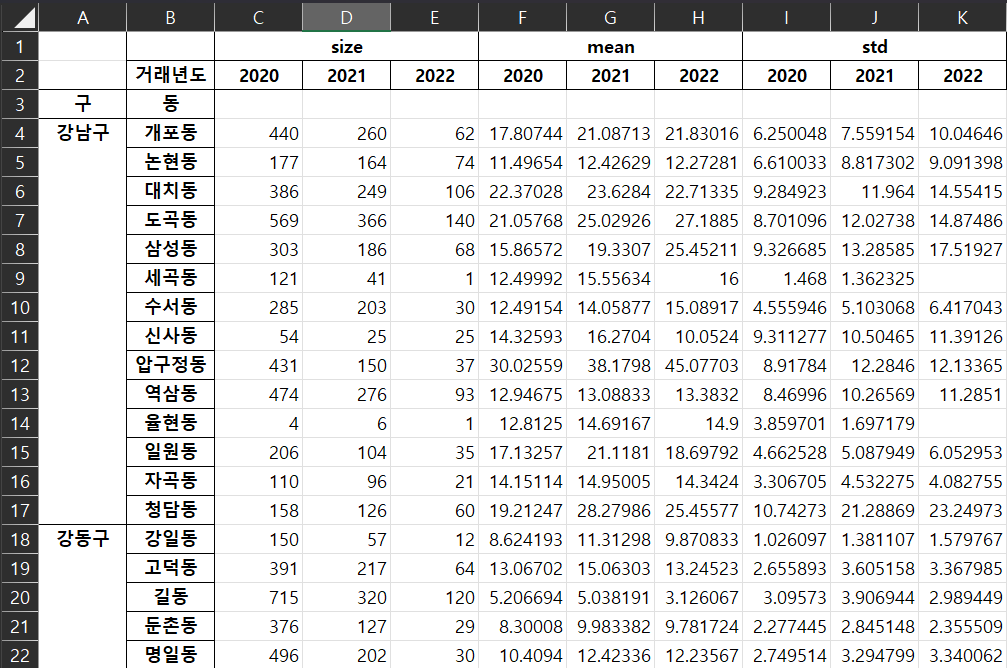

In [31]:
# 두 범주형 변수로 연속형 변수를 요약한 피벗 테이블을 생성합니다.

pd.pivot_table(data = price, 
               values = '거래금액', 
               index = ['구', '동'], 
               columns = '거래년도', 
               aggfunc = np.mean,
               margins = True, 
               margins_name = '합계')

거래년도          2020       2021       2022         합계
구   동                                              
강남구 개포동  17.807443  21.087132  21.830161  19.253804
    논현동  11.496543  12.426288  12.272811  12.002379
    대치동  22.370284  23.628400  22.713349  22.842127
    도곡동  21.057678  25.029262  27.188498  23.208296
    삼성동  15.865716  19.330704  25.452107  18.193117
...            ...        ...        ...        ...
중랑구 묵동    5.909851   7.132410   5.220658   6.232563
    상봉동   5.368824   7.195095   4.348186   5.546616
    신내동   4.883848   6.270315   6.086235   5.434858
    중화동   5.008245   6.349304   4.272609   5.420873
합계        8.458884  10.270182   9.744280   9.133086

[333 rows x 4 columns]

### 범주형/이산형 변수의 빈도수/상대도수 확인

In [32]:
# 구에서 중복을 제거한 원소를 반환합니다.

price['구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [33]:
# 구에서 중복을 제거한 원소 개수를 반환합니다.

price['구'].nunique()

25

In [34]:
# 구별 빈도수를 내림차순 정렬한 결과를 반환합니다.

price['구'].value_counts()

구
노원구     13909
강서구      9322
구로구      8491
송파구      7432
성북구      7386
도봉구      6876
강동구      6801
강남구      6723
서초구      6194
영등포구     5998
양천구      5793
은평구      5724
동대문구     5496
중랑구      5089
동작구      5031
성동구      4920
마포구      4849
관악구      4604
서대문구     4558
강북구      3379
금천구      3093
용산구      2685
광진구      2310
중구       1835
종로구      1419
Name: count, dtype: int64

In [35]:
# 구별 빈도수를 오름차순 정렬한 결과를 반환합니다.

price['구'].value_counts(ascending = True)

구
종로구      1419
중구       1835
광진구      2310
용산구      2685
금천구      3093
강북구      3379
서대문구     4558
관악구      4604
마포구      4849
성동구      4920
동작구      5031
중랑구      5089
동대문구     5496
은평구      5724
양천구      5793
영등포구     5998
서초구      6194
강남구      6723
강동구      6801
도봉구      6876
성북구      7386
송파구      7432
구로구      8491
강서구      9322
노원구     13909
Name: count, dtype: int64

In [36]:
# 구별 빈도수를 시리즈 인덱스로 오름차순 정렬한 결과를 반환합니다.

price['구'].value_counts().sort_index()

구
강남구      6723
강동구      6801
강북구      3379
강서구      9322
관악구      4604
광진구      2310
구로구      8491
금천구      3093
노원구     13909
도봉구      6876
동대문구     5496
동작구      5031
마포구      4849
서대문구     4558
서초구      6194
성동구      4920
성북구      7386
송파구      7432
양천구      5793
영등포구     5998
용산구      2685
은평구      5724
종로구      1419
중구       1835
중랑구      5089
Name: count, dtype: int64

In [37]:
# 구별 상대도수를 내림차순 정렬한 결과를 반환합니다.

price['구'].value_counts(normalize = True) * 100

구
노원구     9.940894
강서구     6.662521
구로구     6.068598
송파구     5.311721
성북구     5.278844
도봉구     4.914342
강동구     4.860739
강남구     4.804992
서초구     4.426910
영등포구    4.286827
양천구     4.140312
은평구     4.090997
동대문구    3.928043
중랑구     3.637156
동작구     3.595703
성동구     3.516370
마포구     3.465626
관악구     3.290522
서대문구    3.257646
강북구     2.415003
금천구     2.210596
용산구     1.918995
광진구     1.650979
중구      1.311492
종로구     1.014173
Name: proportion, dtype: float64

In [38]:
price.groupby(by = '구')['거래금액'].count().sort_values(ascending = False) / len(price)

구
노원구     0.099409
강서구     0.066625
구로구     0.060686
송파구     0.053117
성북구     0.052788
도봉구     0.049143
강동구     0.048607
강남구     0.048050
서초구     0.044269
영등포구    0.042868
양천구     0.041403
은평구     0.040910
동대문구    0.039280
중랑구     0.036372
동작구     0.035957
성동구     0.035164
마포구     0.034656
관악구     0.032905
서대문구    0.032576
강북구     0.024150
금천구     0.022106
용산구     0.019190
광진구     0.016510
중구      0.013115
종로구     0.010142
Name: 거래금액, dtype: float64

### 교차 테이블 생성

> 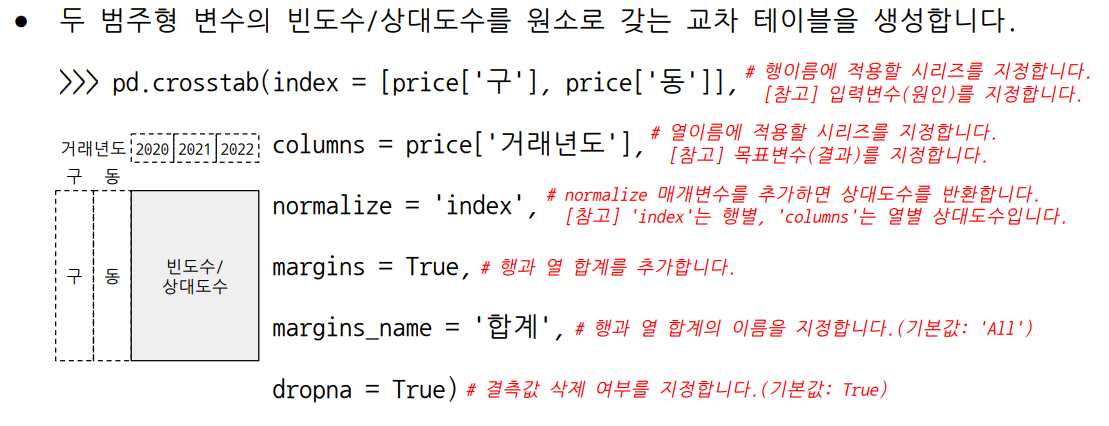

In [39]:
price[['구', '동']].value_counts().sort_index()

구    동  
강남구  개포동     762
     논현동     415
     대치동     741
     도곡동    1075
     삼성동     557
            ... 
중랑구  면목동    1176
     묵동      781
     상봉동     870
     신내동    1533
     중화동     323
Name: count, Length: 332, dtype: int64

In [40]:
# 두 범주형 변수의 빈도수/상대도수를 원소로 갖는 교차 테이블을 생성합니다.

pd.crosstab(index = [price['구'], price['동']],
            columns = price['거래년도'], 
            normalize = 'index',
            margins = True, 
            margins_name = '합계', 
            dropna = True)

거래년도         2020      2021      2022
구   동                                
강남구 개포동  0.577428  0.341207  0.081365
    논현동  0.426506  0.395181  0.178313
    대치동  0.520918  0.336032  0.143050
    도곡동  0.529302  0.340465  0.130233
    삼성동  0.543986  0.333932  0.122083
...           ...       ...       ...
중랑구 묵동   0.583867  0.318822  0.097311
    상봉동  0.497701  0.242529  0.259770
    신내동  0.595564  0.351598  0.052838
    중화동  0.582043  0.346749  0.071207
합계       0.602457  0.310327  0.087216

[333 rows x 3 columns]

### Long type 데이터프레임 생성

In [41]:
# 두 범주형 변수의 빈도수를 elong에 할당합니다.
# [참고] elong은 구와 금액구간이 멀티 인덱스(행이름)인 시리즈입니다.

elong = price[['구', '금액구간']].value_counts().sort_index()
elong.head()

구    금액구간 
강남구  5천 미만    1521
     5천 이상    5202
강동구  5천 미만    4769
     5천 이상    2032
강북구  5천 미만    3368
Name: count, dtype: int64

In [42]:
# elong의 행이름을 초기화하고 기존 행이름을 열로 추가합니다.
# [참고] 마지막 열이름은 'count'로 자동 생성되었습니다.

elong = elong.reset_index()
elong.head()

,구,금액구간,count
0,강남구,5천 미만,1521
1,강남구,5천 이상,5202
2,강동구,5천 미만,4769
3,강동구,5천 이상,2032
4,강북구,5천 미만,3368


In [43]:
# elong의 마지막 열이름을 변경합니다.

elong = elong.rename(columns = {'count': '매매건수'})
elong.head()

,구,금액구간,매매건수
0,강남구,5천 미만,1521
1,강남구,5천 이상,5202
2,강동구,5천 미만,4769
3,강동구,5천 이상,2032
4,강북구,5천 미만,3368


### pivot( ) : Long type을 Wide type으로 변환

In [44]:
# 범주형 변수로 행(인덱스)과 열(컬럼)을 설정하고 연속형 변수로 채웁니다.

widen = elong.pivot(index = '구', 
                    columns = '금액구간', 
                    values = '매매건수')
widen.head()

금액구간,5천 미만,5천 이상
구,,
강남구,1521,5202
강동구,4769,2032
강북구,3368,11
강서구,8486,836
관악구,4483,121


In [45]:
# widen의 행이름을 출력합니다.
# [참고] 행이름에 name(이름) 속성이 있고 값은 '구'입니다.

widen.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구')

In [46]:
# 행이름의 name을 출력합니다.
# [참고] widen의 행이름을 초기화하면 인덱스 name을 열이름으로 자동 적용합니다.

widen.index.name

'구'

### widen 행이름 초기화

In [47]:
# widen의 행이름을 초기화하고 기존 행이름을 열로 추가합니다.
# [참고] 행이름의 name 값인 '구'를 열이름으로 자동 적용했습니다.

widen = widen.reset_index()
widen.head()

금액구간,구,5천 미만,5천 이상
0,강남구,1521,5202
1,강동구,4769,2032
2,강북구,3368,11
3,강서구,8486,836
4,관악구,4483,121


In [48]:
# widen의 열이름을 출력합니다.
# [참고] 열이름에 name(이름) 속성이 있고 값은 '금액구간'입니다.

widen.columns

Index(['구', '5천 미만', '5천 이상'], dtype='object', name='금액구간')

In [49]:
# 열이름의 name을 출력합니다.

widen.columns.name

'금액구간'

In [50]:
# 열이름의 name에 None을 할당하여 삭제합니다.

widen.columns.name = None
widen.head()

,구,5천 미만,5천 이상
0,강남구,1521,5202
1,강동구,4769,2032
2,강북구,3368,11
3,강서구,8486,836
4,관악구,4483,121


### melt( ) : Wide type을 Long type으로 변환

In [51]:
# Wide type을 Long Type 으로 변환 시 widen.melt

widen.melt(id_vars = '구', var_name = '구분', value_name = '건수').head()

,구,구분,건수
0,강남구,5천 미만,1521
1,강동구,5천 미만,4769
2,강북구,5천 미만,3368
3,강서구,5천 미만,8486
4,관악구,5천 미만,4483


In [52]:
# 두 개 이상의 열이름을 지정하여 데이터프레임을 세로로 늘입니다.

elong = widen.melt(id_vars = '구', 
                   value_vars = ['5천 미만', '5천 이상'], 
                   var_name = '구분', 
                   value_name = '건수')
elong.head()

,구,구분,건수
0,강남구,5천 미만,1521
1,강동구,5천 미만,4769
2,강북구,5천 미만,3368
3,강서구,5천 미만,8486
4,관악구,5천 미만,4483


In [53]:
# elong을 구로 오름차순 정렬하고 행이름을 초기화한 다음 처음 5행을 출력합니다.

elong.sort_values(by = '구').reset_index(drop = True).head()

,구,구분,건수
0,강남구,5천 미만,1521
1,강남구,5천 이상,5202
2,강동구,5천 이상,2032
3,강동구,5천 미만,4769
4,강북구,5천 미만,3368


### 데이터프레임 결합

> 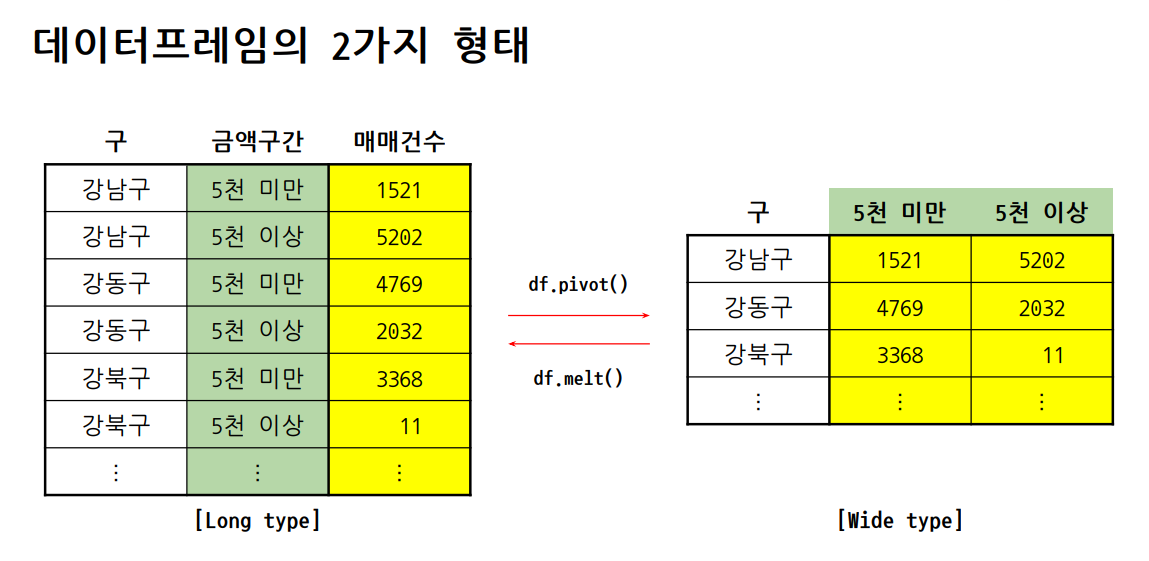

In [54]:
# df1의 컬럼리스트를 반환한다.

df1.columns

Index(['index', '아파트', '시', '구', '동', '지번', '건축년도', '거래일', '전용면적', '층',
       '거래금액'],
      dtype='object')

In [55]:
# df2의 컬럼리스트를 반환한다.

df2.columns

Index(['아파트', '시', '구', '동', '지번', '건축년도', '거래일', '전용면적', '층', '거래금액'], dtype='object')

In [56]:
# 두 데이터프레임의 열이름이 순서까지 정확하게 같은지 확인합니다.
# [참고] equals() 함수는 원소의 순서만 달라도 False를 반환합니다.

df1.columns.equals(other = df2.columns)

False

> * 열방향으로 결합

In [57]:
# 열이름이 같은 두 데이터프레임을 행(세로) 방향으로 결합한 결과를 출력합니다.
# [참고] 두 데이터프레임의 기존 행이름을 유지합니다.

pd.concat(objs = [df1, df2])

,index,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액
0,0.0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2021-12-13,268.950,2,1200000
1,1.0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2022-04-30,268.670,5,1350000
2,2.0,PH129,서울특별시,강남구,청담동,129,2020.0,2022-04-28,273.960,16,1450000
3,3.0,아크로서울포레스트,서울특별시,성동구,성수동1가,685-700,2020.0,2022-09-30,264.546,47,1300000
50867,NaN,현대하이페리온,서울특별시,양천구,목동,916,2003.0,2020-07-03,154.050,66,240000
55000,NaN,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-07-25,235.740,67,542500
69573,NaN,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-10-27,185.622,66,380000
110650,NaN,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2021-06-24,214.967,66,458000


In [58]:
# 두 데이터프레임을 세로로 결합하고 행이름을 초기화합니다.

pd.concat(objs = [df1, df2], ignore_index = True)

,index,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액
0,0.0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2021-12-13,268.950,2,1200000
1,1.0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2022-04-30,268.670,5,1350000
2,2.0,PH129,서울특별시,강남구,청담동,129,2020.0,2022-04-28,273.960,16,1450000
3,3.0,아크로서울포레스트,서울특별시,성동구,성수동1가,685-700,2020.0,2022-09-30,264.546,47,1300000
4,NaN,현대하이페리온,서울특별시,양천구,목동,916,2003.0,2020-07-03,154.050,66,240000
5,NaN,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-07-25,235.740,67,542500
6,NaN,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-10-27,185.622,66,380000
7,NaN,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2021-06-24,214.967,66,458000


In [59]:
# df2의 일부 열이름을 변경합니다.

df2 = df2.rename(columns = {'아파트': '아파트명'})
df2

,아파트명,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액
50867,현대하이페리온,서울특별시,양천구,목동,916,2003.0,2020-07-03,154.050,66,240000
55000,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-07-25,235.740,67,542500
69573,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-10-27,185.622,66,380000
110650,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2021-06-24,214.967,66,458000


In [60]:
# 열이름이 다른 두 데이터프레임을 행(세로) 방향으로 결합한 결과를 출력합니다.

pd.concat(objs = [df1, df2], ignore_index = True)

,index,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액,아파트명
0,0.0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2021-12-13,268.950,2,1200000,NaN
1,1.0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2022-04-30,268.670,5,1350000,NaN
2,2.0,PH129,서울특별시,강남구,청담동,129,2020.0,2022-04-28,273.960,16,1450000,NaN
3,3.0,아크로서울포레스트,서울특별시,성동구,성수동1가,685-700,2020.0,2022-09-30,264.546,47,1300000,NaN
4,NaN,NaN,서울특별시,양천구,목동,916,2003.0,2020-07-03,154.050,66,240000,현대하이페리온
5,NaN,NaN,서울특별시,강남구,도곡동,467-29,2004.0,2020-07-25,235.740,67,542500,타워팰리스3
6,NaN,NaN,서울특별시,강남구,도곡동,467-29,2004.0,2020-10-27,185.622,66,380000,타워팰리스3
7,NaN,NaN,서울특별시,강남구,도곡동,467-29,2004.0,2021-06-24,214.967,66,458000,타워팰리스3


> ### 열의 방향으로 결합

In [61]:
# 열 방향 (axis = 1)으로 결합

pd.concat(objs = [df1, df2], axis = 1)

,index,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,...,아파트명,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액
0,0.0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2021-12-13,268.950,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,1.0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2022-04-30,268.670,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,2.0,PH129,서울특별시,강남구,청담동,129,2020.0,2022-04-28,273.960,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,3.0,아크로서울포레스트,서울특별시,성동구,성수동1가,685-700,2020.0,2022-09-30,264.546,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
50867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,현대하이페리온,서울특별시,양천구,목동,916,2003.0,2020-07-03,154.050,66.0,240000.0
55000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-07-25,235.740,67.0,542500.0
69573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-10-27,185.622,66.0,380000.0
110650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2021-06-24,214.967,66.0,458000.0


In [62]:
df2 = df2.reset_index(drop = True)
df2

,아파트명,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액
0,현대하이페리온,서울특별시,양천구,목동,916,2003.0,2020-07-03,154.050,66,240000
1,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-07-25,235.740,67,542500
2,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-10-27,185.622,66,380000
3,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2021-06-24,214.967,66,458000


In [63]:
pd.concat(objs = [df1, df2], axis = 1, ignore_index = True)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,파르크한남,서울특별시,용산구,한남동,410,2020.0,2021-12-13,268.950,2,...,현대하이페리온,서울특별시,양천구,목동,916,2003.0,2020-07-03,154.050,66,240000
1,1,파르크한남,서울특별시,용산구,한남동,410,2020.0,2022-04-30,268.670,5,...,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-07-25,235.740,67,542500
2,2,PH129,서울특별시,강남구,청담동,129,2020.0,2022-04-28,273.960,16,...,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2020-10-27,185.622,66,380000
3,3,아크로서울포레스트,서울특별시,성동구,성수동1가,685-700,2020.0,2022-09-30,264.546,47,...,타워팰리스3,서울특별시,강남구,도곡동,467-29,2004.0,2021-06-24,214.967,66,458000


### 병합 데이터셋 준비

> 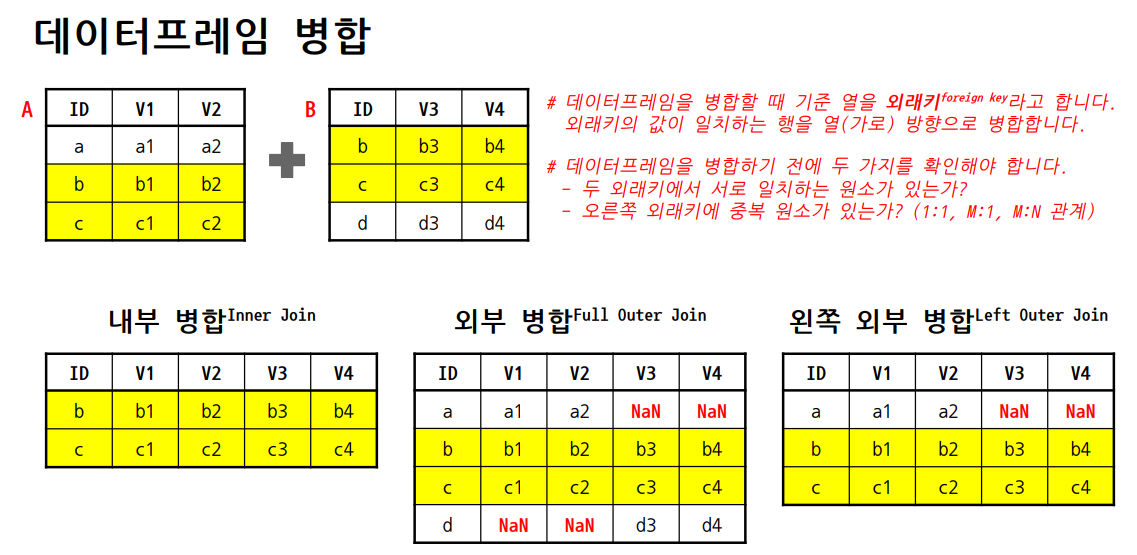

In [64]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.

sorted(os.listdir())

['APT_Detail_Seoul_2022.csv',
 'APT_Detail_Seoul_2022.xlsx',
 'APT_Price_Data.z',
 'APT_Price_Prep.z',
 'APT_Price_Seoul_2020.csv',
 'APT_Price_Seoul_2020_2022.xlsx',
 'APT_Price_Seoul_2021.csv',
 'APT_Price_Seoul_2022.csv',
 'NA_Sample.xlsx',
 'code',
 'test.xlsx']

In [65]:
# 상세정보 xlsx 파일을 읽고 데이터프레임을 생성합니다.

detail = pd.read_excel(io = 'APT_Detail_Seoul_2022.xlsx')

In [66]:
# detail의 정보를 확인합니다.

detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   아파트ID   10290 non-null  int64  
 1   아파트명    10290 non-null  object 
 2   지번주소    10290 non-null  object 
 3   위도      10290 non-null  float64
 4   경도      10290 non-null  float64
 5   동수      10290 non-null  int64  
 6   세대수     10290 non-null  int64  
 7   임대수     10290 non-null  int64  
 8   용적률     10290 non-null  int64  
 9   건폐율     10290 non-null  int64  
 10  주차대수    10290 non-null  int64  
 11  건설사     9746 non-null   object 
dtypes: float64(2), int64(7), object(3)
memory usage: 964.8+ KB


In [67]:
# detail의 처음 5행을 출력합니다.
# 해석 : 아파트 ID는 네이버 포탈의 데이터라 연관성이 없다. 다른 연결 가능한 컬럼을 찾아 보자

detail.head()

,아파트ID,아파트명,지번주소,위도,경도,동수,세대수,임대수,용적률,건폐율,주차대수,건설사
0,146479,YH빌리지,서울시 강남구 개포동 1237-8,37.478247,127.046670,1,16,0,297,59,9,(주)세담종합건설
1,119219,개포래미안포레스트,서울시 강남구 개포동 1282,37.478448,127.054031,31,2296,120,249,21,3961,삼성물산(주)
2,140057,개포비버리하임(도시형),서울시 강남구 개포동 1193-5,37.474555,127.049412,2,29,0,199,57,30,(주)덕인컨스텍
3,107513,개포상지리츠빌,서울시 강남구 개포동 176-1,37.487257,127.060199,1,18,0,202,31,41,상지건영(주)
4,8928,개포자이,서울시 강남구 개포동 12-2,37.496437,127.077115,4,212,0,250,18,502,LG건설(주)


### 외래키 확인 및 전처리

In [68]:
# price 아파트에서 중복 제거한 원소 개수를 확인합니다.

price['아파트'].nunique()

6601

In [69]:
# price 아파트와 detail 아파트명에서 일치하는 원소 개수를 확인합니다.

len(set(price['아파트']) & set(detail['아파트명']))

2556

In [70]:
# price 주소에서 중복 제거한 원소 개수를 확인합니다.

price['주소'].nunique()

7610

In [71]:
# price 주소와 detail 지번주소에서 일치하는 원소 개수를 확인합니다.

len(set(price['주소']) & set(detail['지번주소']))

0

In [72]:
# price의 처음 5행을 출력합니다.
# [참고] price 주소가 '서울특별시'로 시작합니다.

price['주소'].head()

0       서울특별시 종로구 필운동 254
1       서울특별시 종로구 사직동 9-1
2       서울특별시 종로구 내수동 167
3    서울특별시 종로구 내수동 110-15
4        서울특별시 종로구 내수동 95
Name: 주소, dtype: object

In [73]:
# detail의 처음 5행을 출력합니다.
# [참고] detail 지번주소는 '서울시'로 시작합니다.

detail['지번주소'].head()

0    서울시 강남구 개포동 1237-8
1      서울시 강남구 개포동 1282
2    서울시 강남구 개포동 1193-5
3     서울시 강남구 개포동 176-1
4      서울시 강남구 개포동 12-2
Name: 지번주소, dtype: object

In [74]:
# price 주소에서 '특별'을 삭제합니다.

price['주소'] = price['주소'].str.replace(pat = '특별', repl = '')

In [75]:
# 외래키에서 일치하는 원소 개수를 다시 확인합니다.
### 해석 : 아파트명보다 교집합 개수가 많아 외래키로 사용이 가능할 것 같다. ###

len(set(price['주소']) & set(detail['지번주소']))

6773

In [76]:
# 차집합을 확인한다. 
# 현업에서는 0이 될때까지 클렌징을 해야 한다. 

len(set(price['주소']) - set(detail['지번주소']))

837

### [참고] 비복원추출 : 선택한 Data 는 빼버린다.

> ### 로또번호 

In [77]:
# 로또번호를 Random 으로 추천해 준다.

lotto = np.random.choice(a = range(1, 46), size = 6, replace = False)
sorted(lotto)

[3, 20, 21, 29, 30, 38]

In [78]:
# 로또번호 10개를 Random 하게 추천해 준다. (비복원추출 : seed를 무작위)

for i in range(10):
    np.random.seed()
    lotto = np.random.choice(a = range(1, 46), size = 6, replace = False)
    print(sorted(lotto))

[12, 18, 22, 25, 39, 42]
[3, 6, 12, 18, 21, 44]
[10, 14, 20, 21, 25, 37]
[1, 5, 15, 32, 33, 41]
[13, 14, 18, 19, 41, 45]
[9, 19, 21, 31, 37, 40]
[2, 6, 8, 17, 32, 39]
[3, 7, 23, 24, 29, 34]
[16, 28, 30, 39, 41, 43]
[13, 19, 25, 27, 31, 39]


In [79]:
# 로또번호 10개를 고정된 번호로 추천해 준다. (복원추출 : seed를 고정한다.)

for i in range(10):
    np.random.seed(seed = 12)
    lotto = np.random.choice(a = range(1, 46), size = 6, replace = False)
    print(sorted(lotto))

[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]
[8, 24, 33, 37, 38, 42]


In [80]:
# 반복문으로 로또 번호를 10번 출력합니다.

for i in range(10):
    np.random.seed(seed = 1)
    lotto = np.random.choice(a = range(1, 46), 
                             size = 6, 
                             replace = False)
    print(sorted(lotto))

[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]
[3, 4, 22, 23, 31, 42]


### [참고] 복원추출

In [81]:
# 시드를 고정합니다.

np.random.seed(seed = 1)

In [82]:
# 1~4의 정수에서 5개를 복원추출하여 nums에 할당합니다.

nums = np.random.choice(a = range(1, 5), size = 5)
nums

array([2, 4, 1, 1, 4])

### [참고] 중복 원소 확인 함수

In [83]:
nums = pd.Series(nums)
nums

0    2
1    4
2    1
3    1
4    4
dtype: int32

In [84]:
# 중복이 처음 나오면 False로 표기되고, 두번째 중복부터는 True로 표시 된다.
# '~' 틸데로 보정이 필요하다. 

nums.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [85]:
# nums 에서 중복 결과의 번호를 반환한다.

nums[nums.duplicated()]

3    1
4    4
dtype: int32

In [86]:
# 중복오류에 대한 여집합을 반환한다.

nums[~nums.duplicated()]

0    2
1    4
2    1
dtype: int32

In [88]:
# 중복된 원소의 논리결과를 반환한다. 

nums.duplicated(keep = False)

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [89]:
# 중복 원소를 정렬해 준다. 

nums[nums.duplicated(keep = False)].sort_values()

2    1
3    1
1    4
4    4
dtype: int32

In [90]:
# 시리즈 원소의 중복 여부(True, False)를 원소로 갖는 시리즈 dup을 생성합니다.
# [참고] keep 매개변수에 'first'(기본값), 'last' 또는 False를 지정합니다.

dup = nums.duplicated(keep = False)

In [91]:
# nums에서 중복인 원소를 모두 선택합니다.

nums[dup]

1    4
2    1
3    1
4    4
dtype: int32

In [92]:
# 시리즈에서 첫 번째 중복 원소만 False, 나머지 원소는 True인 dup을 생성합니다.
# [참고] keep 매개변수에 'last'를 지정하면 시리즈의 중복 원소 중 마지막 원소만 False, 
# 나머지 원소는 True를 반환합니다.

dup = nums.duplicated()

In [93]:
# nums에서 첫 번째 중복 원소를 제외한 나머지 원소를 선택합니다.
# [참고] 중복이 아닌 원소는 False이므로 선택하지 않습니다.

nums[dup]

3    1
4    4
dtype: int32

In [94]:
# nums에서 중복이 아닌 원소와 중복 원소 중 첫 번째 원소만 선택합니다.
# [참고] ~ 연산자는 진리값을 반전합니다.

nums[~dup]

0    2
1    4
2    1
dtype: int32

### 데이터프레임 중복 확인 및 제거

In [95]:
# detail에서 지번주소의 원소가 중복이면 True, 아니면 False인 dup을 생성합니다.

dup = detail['지번주소'].duplicated(keep = False)
dup

0        False
1        False
2        False
3        False
4        False
         ...  
10285    False
10286    False
10287    False
10288    False
10289    False
Name: 지번주소, Length: 10290, dtype: bool

In [96]:
# detail에서 지번주소가 중복인 행을 선택하고 지번주소로 오름차순 정렬합니다.

#detail[dup].sort_values(by = '지번주소')

detail.loc[dup].sort_values(by = '지번주소')

,아파트ID,아파트명,지번주소,위도,경도,동수,세대수,임대수,용적률,건폐율,주차대수,건설사
18,419,대청,서울시 강남구 개포동 12,37.495077,127.077121,6,822,0,0,0,700,삼익건설(주)
19,483,대치2단지,서울시 강남구 개포동 12,37.494658,127.075486,11,1758,0,174,12,1758,"진덕산업(주),성원건설(주)"
8,1303,개포주공6단지,서울시 강남구 개포동 185,37.488645,127.070472,9,1060,0,0,0,300,대한주택공사
9,1307,개포주공7단지,서울시 강남구 개포동 185,37.489561,127.072416,8,900,0,0,0,400,대한주택공사
474,724,"현대6,7차",서울시 강남구 압구정동 456,37.530219,127.028999,15,1288,0,210,16,1120,NaN
475,27498,현대65동(대림아크로빌),서울시 강남구 압구정동 456,37.531534,127.032195,1,56,0,240,20,89,NaN
956,902,주공고층3단지,서울시 강동구 둔촌동 174-1,37.524232,127.138849,25,1480,0,0,0,1468,대한주택공사
959,901,주공저층2단지,서울시 강동구 둔촌동 174-1,37.522661,127.135948,36,900,0,0,0,630,대한주택공사
1325,133403,미사아름채(도시형),서울시 강동구 천호동 452-15,37.538300,127.128247,1,130,0,553,59,65,주식회사미사종합건설
1326,133402,미사아름채(주상복합),서울시 강동구 천호동 452-15,37.538306,127.128271,1,1,0,553,59,0,주식회사미사종합건설


In [97]:
# detail에서 지번주소가 중복이 아니거나 중복인 첫 번째 행만 남깁니다.
# [참고] ~ 연산자는 진리값을 반전합니다.

detail = detail[~detail['지번주소'].duplicated()]

In [98]:
# detail의 행 개수를 확인합니다.
# [참고] detail의 행 개수가 감소했습니다.(10290 -> 10261)

detail.shape[0]

10261

### 데이터프레임 병합

In [99]:
# price와 detail에서 일치하는 열이름을 확인합니다.

set(price.columns) & set(detail.columns)

set()

In [100]:
# price와 detail로 내부 병합을 실행합니다. 외래키는 '주소'와 '지번주소'입니다.

pd.merge(left = price, 
         right = detail, 
         how = 'inner', 
         left_on = '주소', 
         right_on = '지번주소')

,아파트,시,구,동,지번,건축년도,거래일,전용면적,층,거래금액,...,지번주소,위도,경도,동수,세대수,임대수,용적률,건폐율,주차대수,건설사
0,신동아블루아광화문의꿈,서울특별시,종로구,필운동,254,2007,2020-01-03,111.97,6,10.000,...,서울시 종로구 필운동 254,37.575816,126.969968,1,28,0,515,59,39,(주)신동아종합건설
1,신동아블루아광화문의꿈,서울특별시,종로구,필운동,254,2007,2020-02-21,108.95,7,9.600,...,서울시 종로구 필운동 254,37.575816,126.969968,1,28,0,515,59,39,(주)신동아종합건설
2,신동아블루아광화문의꿈,서울특별시,종로구,필운동,254,2007,2021-10-25,111.97,8,14.000,...,서울시 종로구 필운동 254,37.575816,126.969968,1,28,0,515,59,39,(주)신동아종합건설
3,세종로대우,서울특별시,종로구,내수동,167,1994,2020-01-06,109.91,11,8.800,...,서울시 종로구 내수동 167,37.572764,126.973305,1,60,0,499,38,167,대우건설
4,세종로대우,서울특별시,종로구,내수동,167,1994,2020-02-20,66.96,12,6.150,...,서울시 종로구 내수동 167,37.572764,126.973305,1,60,0,499,38,167,대우건설
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132808,더메종건대,서울특별시,광진구,화양동,23-5,2022,2022-12-23,17.78,12,2.585,...,서울시 광진구 화양동 23-5,37.547571,127.067317,1,99,0,659,59,56,NaN
132809,삼영N-CITY,서울특별시,은평구,응암동,96-19,2015,2022-12-24,45.91,6,3.170,...,서울시 은평구 응암동 96-19,37.601085,126.925963,1,18,0,339,55,15,(전)신원아키텍
132810,길훈로즈빌,서울특별시,양천구,신정동,1297,2002,2022-12-16,84.95,14,11.600,...,서울시 양천구 신정동 1297,37.522555,126.871307,1,49,0,259,17,56,길훈종합건설(주)
132811,길훈로즈빌,서울특별시,양천구,신정동,1297,2002,2022-12-19,84.95,14,11.600,...,서울시 양천구 신정동 1297,37.522555,126.871307,1,49,0,259,17,56,길훈종합건설(주)


In [101]:
# detail의 외래키 이름을 '주소'로 변경합니다.

detail = detail.rename(columns = {'지번주소': '주소'})

In [102]:
# price와 detail에서 일치하는 열이름을 확인합니다.

set(price.columns) & set(detail.columns)

{'주소'}

In [103]:
# 외래키 이름이 같으면 on 매개변수를 사용합니다.
# [참고] 두 데이터프레임에서 외래키 이름만 같으면 on 매개변수를 생략할 수 있습니다.

# apt = pd.merge(left = price, right = detail)

apt = pd.merge(left = price, right = detail, how = 'inner', on = '주소')

In [104]:
# apt의 정보를 확인합니다.

apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132813 entries, 0 to 132812
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   아파트     132813 non-null  object        
 1   시       132813 non-null  object        
 2   구       132813 non-null  object        
 3   동       132813 non-null  object        
 4   지번      132813 non-null  object        
 5   건축년도    132813 non-null  int32         
 6   거래일     132813 non-null  datetime64[ns]
 7   전용면적    132813 non-null  float64       
 8   층       132813 non-null  int32         
 9   거래금액    132813 non-null  float64       
 10  평당금액    132813 non-null  float64       
 11  거래년도    132813 non-null  int32         
 12  경과년수    132813 non-null  int32         
 13  거래월     132813 non-null  object        
 14  금액구간    132813 non-null  object        
 15  주소      132813 non-null  object        
 16  아파트ID   132813 non-null  int64         
 17  아파트명    132813 non-null  obje

### 외부 파일로 저장

In [105]:
# apt를 xlsx 파일로 저장합니다.

%time apt.to_excel(excel_writer = 'APT_Price_Merged.xlsx', index = False)

CPU times: total: 29.7 s
Wall time: 1min


In [106]:
# apt를 csv 파일로 저장합니다.

%time apt.to_csv(path_or_buf = 'APT_Price_Merged.csv', index = False)

CPU times: total: 406 ms
Wall time: 976 ms


In [107]:
# apt를 z 파일로 저장합니다.

%time joblib.dump(value = apt, filename = 'APT_Price_Merged.z')

CPU times: total: 93.8 ms
Wall time: 281 ms


['APT_Price_Merged.z']

## End of Document